# Проект: Принятие решений в бизнесе

**Контекст:** Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга подготовили список гипотез для увеличения выручки.
**Задачи:** Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.

**Описание данных:**

*Файл /datasets/hypothesis.csv*
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.

*Файл /datasets/orders.csv*
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

*Файл /datasets/visitors.csv*
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

**Содержание:**
1. [Загрузка данных и изучение общей информации](#chapter1)
2. [Приоритизация гипотез](#chapter2)
3. [Анализ A/B-теста](#chapter3)
4. [Решение по результатам теста](#chapter4)

In [1]:
import pandas as pd
import datetime as dt 
import numpy as np 
import seaborn as sns #?
import matplotlib.pyplot as plt
import scipy.stats as stats 
pd.options.display.max_colwidth = 130 #расширяем вывод содержимого ячеек

<a id="chapter1"></a> 

###  Загрузка данных и подготовка их к анализу

**1.1 Общая информация о данных датафрейма с гипотезами**

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

def first_look (data):
    print('---------Первые 5 строк-----------')
    display(data.head())
    print('---------Основная информация о датафрейме---------------\n')
    display(data.info())
    print('---------Пропуски-----------\n')
    display(data.isna().sum())
    print('\n---------Явные дубликаты-----------\n')
    if data.duplicated().sum() > 0:
        print('Явных дубликатов:', data.duplicated().sum())
    else:
        print('Явных дубликатов НЕТ')

In [3]:
first_look (hypothesis)

---------Первые 5 строк-----------


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


---------Основная информация о датафрейме---------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

---------Пропуски-----------



Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64


---------Явные дубликаты-----------

Явных дубликатов НЕТ


**1.2 Общая информация о данных датафрейма с заказами**

In [4]:
orders = pd.read_csv('/datasets/orders.csv')
first_look (orders)

---------Первые 5 строк-----------


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


---------Основная информация о датафрейме---------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

---------Пропуски-----------



transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


---------Явные дубликаты-----------

Явных дубликатов НЕТ


**1.3 Общая информация о данных датафрейма с результатом А/В-теста**

In [5]:
visitors = pd.read_csv('/datasets/visitors.csv')
first_look (visitors)

---------Первые 5 строк-----------


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


---------Основная информация о датафрейме---------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

---------Пропуски-----------



date        0
group       0
visitors    0
dtype: int64


---------Явные дубликаты-----------

Явных дубликатов НЕТ


**Вывод**

- необходимо привести названия столбцов к нижнему регистру;
- в данных нет пропусков;
- столбы с датами необходио привести к формату дат;
- явных дубликатов нет.

**1.4 Изменим названия колонок**

In [6]:
hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = orders.columns.str.lower()

hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


**1.5 Изменим типы данных**

In [7]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

orders.info()
print('--------------------------------------\n')
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
--------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

**Общий вывод**

Данные из всех датафреймов проверенны. Дубликатов и пропусков не обнаруженно. Названия столбцов приведены к привычному формату. Проблем с содержанием в таблицах не обнаружено.

<a id="chapter2"></a> 

###  Приоритизация гипотез

**2.1 Посчитаем ICE для гипотез**

In [8]:
hypothesis['ice'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 1)
hypothesis.sort_values('ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


**Вывод**
Наиболее перспективные гипотезы по ICE: 
1. Запустить акцию, дающую скидку на товар в день рождения;
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.	

**2.2 Посчитаем RICE для гипотез**

In [9]:
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values('rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


**Вывод**
Наиболее перспективные гипотезы по RICE: 
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.


**Общий вывод**

При применении RICE вместо ICE изменилась приоритизация гипотез, в частности гипотезы:
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	
Так получилось, потому что параметр reach(скольких пользователей затронет изменение), соотвественно, равен 10 и 8, в то время как у других гипотез он меньше.

Выбираем гипотезу для анализа А/В-теста:
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.	

<a id="chapter3"></a>

###  Анализ A/B-теста

**3.1 Предобработка данных перед анализом результатов А/В-теста**

Проверим наличие пользователей, которые присутствуют одновременно и в группе А, и в группе Б

In [10]:
orders_before = len(orders)
orders_before

1197

In [11]:
# Получаем уникальные userid для группы A
userid_A = orders['visitorid'].loc[orders['group'] == 'A'].unique()

# Получаем уникальные userid для группы B
userid_B = orders['visitorid'].loc[orders['group'] == 'B'].unique()

# Преобразуем в множества для удобной работы
set_A = set(userid_A)
set_B = set(userid_B)

# Находим пересечение
intersection_users = set_A.intersection(set_B)

# Подсчитываем количество пользователей в пересечении
count_common_users = len(intersection_users)

print(f'Количество пользователей, присутствующих в группах A и B: {count_common_users}')

Количество пользователей, присутствующих в группах A и B: 58


58 пользователей находятся одновременно в группе А и В. Если пользователь участвовал в обеих группах, то нельзя сказать, участие в какой из них повлияло на его поведение. Таких пользователей лучше исключить.

In [12]:
orders = orders[~orders['visitorid'].isin(intersection_users)]
orders_after = len(orders)
orders_after

1016

**3.2 Построим график кумулятивной выручки по группам**

Собирем кумулятивные данные

In [13]:
datesGroups = orders[['date','group']].drop_duplicates() 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionid': 'nunique',
            'visitorid': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


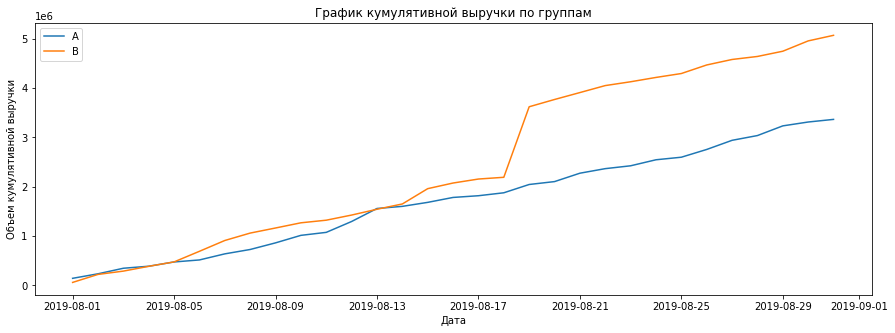

In [14]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15, 5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('График кумулятивной выручки по группам')
plt.ylabel('Объем кумулятивной выручки')
plt.xlabel('Дата')
plt.show()

**Вывод:** Группа В лидирует весь тест. 18.08.2019 заметен резкий скачек группы Б, возможно это неисключенные выбросы.

**3.3 Построим график кумулятивного среднего чека по группам**

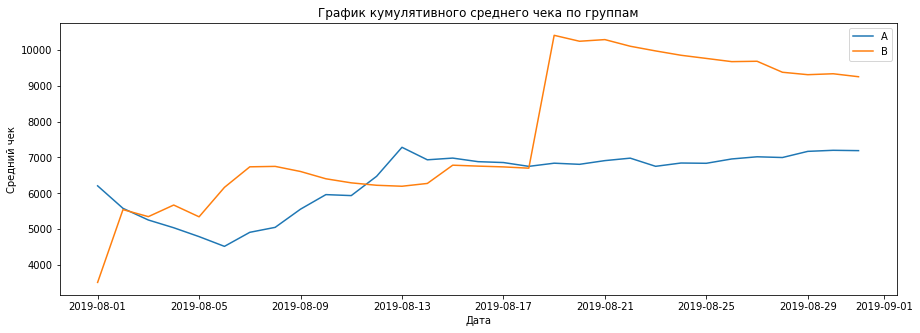

In [15]:
plt.figure(figsize=(15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.show()

**Вывод:** Кумулятивное значение среднего чека колеблется до 18.08.2019, после резкий выброс (скорее всего попали крупные заказы) группы В. После 21.08.2019 график начал выравниваться. 

**3.4 Построим график относительного изменения кумулятивного среднего чека группы B к группе A**

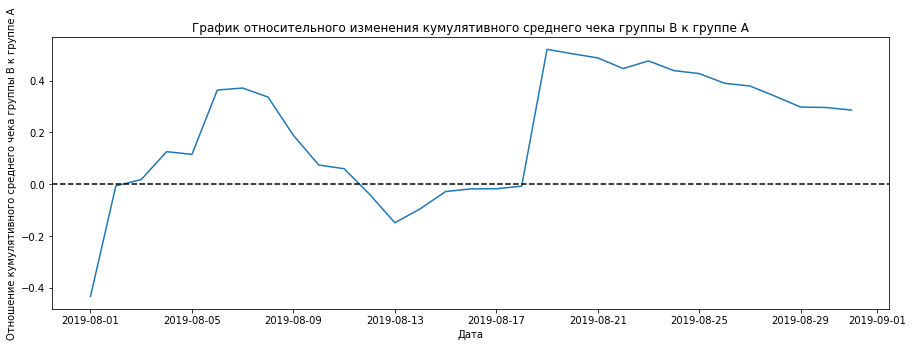

In [16]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15, 5))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('Отношение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.show()

**Вывод:** Результаты теста значительно менялись в несколько дат. Средний чек пользователей группы В существенно превышает аналогичный показатель группы А. Видимо, тогда были совершены аномальные заказы.

**3.5 Построим график кумулятивного среднего количества заказов на посетителя по группам**

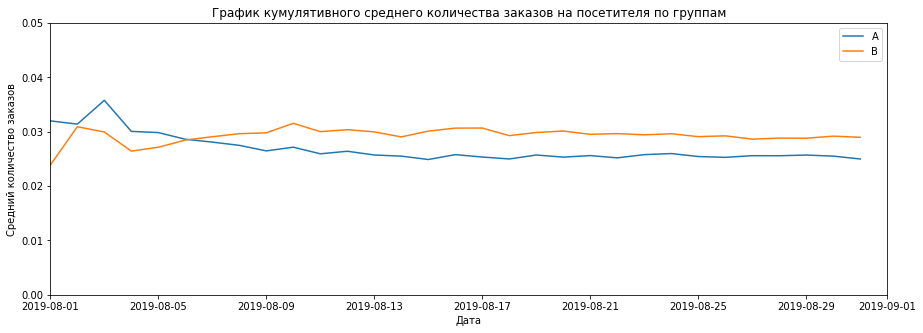

In [17]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(15, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])
plt.legend() 
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Средний количество заказов')
plt.xlabel('Дата')
plt.show()

**Вывод:** В начале теста группа А имела большее кумулятивное среднее количество заказов, но постепенно группа В стала лидировать, и график зафиксировался в районе 2-4%.

**3.6 Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A**

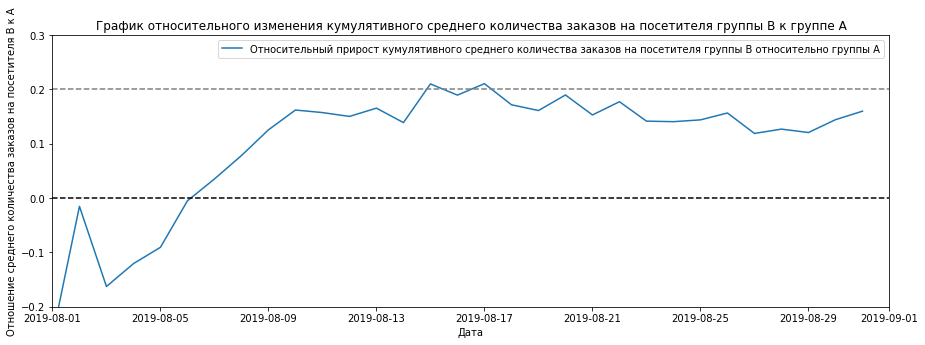

In [18]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.legend() 
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.ylabel('Отношение среднего количества заказов на посетителя В к А')
plt.xlabel('Дата')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.2, 0.3])
plt.show()

**Вывод:** Почти с самого начала группа В лидирует и привышает группу А примерно на 15% (также был скачек чуть больше 20%).

**3.7 Построим точечный график количества заказов по пользователям**

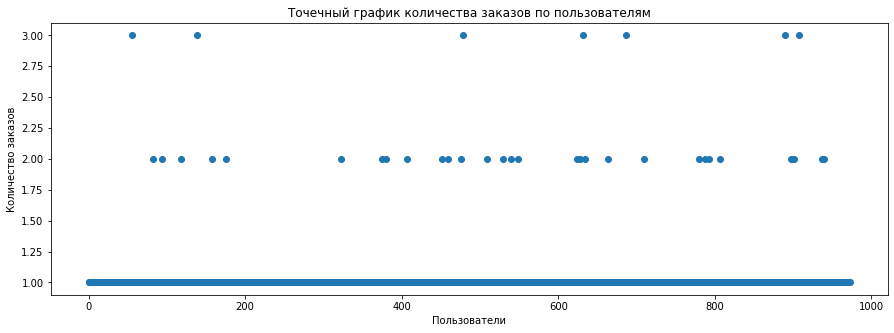

In [19]:
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)
ordersByUsers.columns = ['visitorid', 'transactionid']

x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(15, 5))
plt.scatter(x_values, ordersByUsers['transactionid'])
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Пользователи')
plt.show()

**Вывод:** По графику видно, что в среднем один пользователь делал один заказ.

**3.8 Посчитаем 95-й и 99-й перцентили количества заказов на пользователя**

In [20]:
np.percentile(ordersByUsers['transactionid'], [95, 99])

array([1., 2.])

**Вывод:** Не более 5% пользователей совершали более 2 заказов. И не более 1% пользователей - больше 2 заказов.

**3.9 Построим точечный график стоимостей заказов**

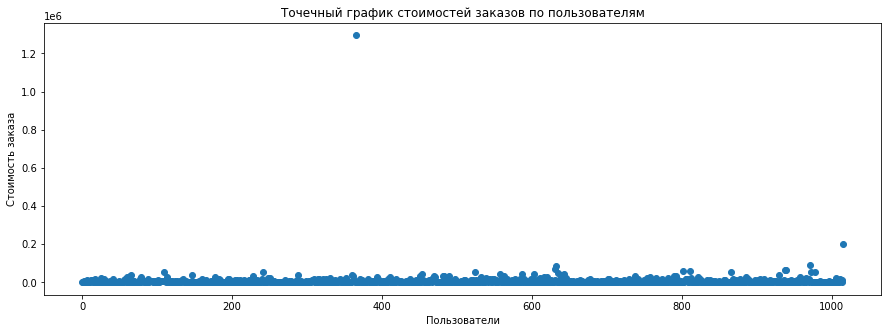

In [21]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(15, 5))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов по пользователям')
plt.ylabel('Стоимость заказа')
plt.xlabel('Пользователи')
plt.show()

**Вывод:** Заказов стоимостью более 20000 рублей очень мало. На графике видно два резко выбивающихся выброса.

**Рассмотрим данный график без выбросов**

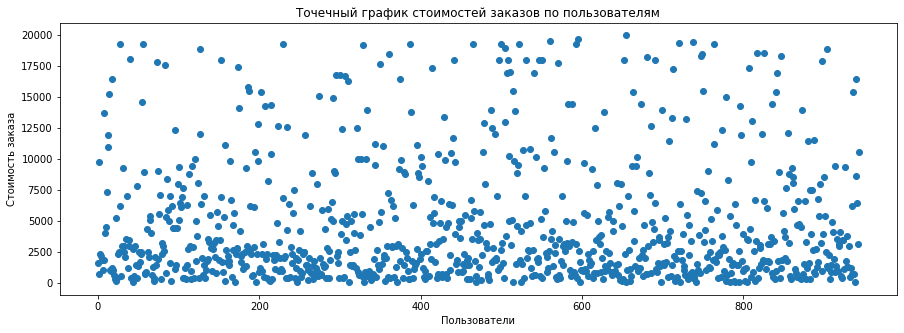

count      944.000000
mean      4616.976695
std       4940.818940
min         50.000000
25%       1100.000000
50%       2600.000000
75%       6252.500000
max      19990.000000
Name: revenue, dtype: float64

In [22]:
user_max_revenue = orders[orders['revenue'] < 20000]
x_values = pd.Series(range(0, len(user_max_revenue)))
plt.figure(figsize=(15, 5))
plt.scatter(x_values, user_max_revenue['revenue'])
plt.title('Точечный график стоимостей заказов по пользователям')
plt.ylabel('Стоимость заказа')
plt.xlabel('Пользователи')
plt.show()
user_max_revenue['revenue'].describe()

**Вывод:** Основная масса заказов находится в диапазоне от 1100 руб. до 6252 руб.

**3.10 Посчитаем 95-й и 99-й перцентили стоимости заказов**

In [23]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

**Вывод:** Не более 5% пользователей совершали заказы на сумму 26785. И не более 1% пользователей - 53904.

**3.11 Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным**

**Сформулируем гипотезы** 

*Нулевая:* различий в среднем количестве заказов между группами нет.

*Альтернативная:* различия в среднем между группами есть.

In [24]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [25]:
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

0.01102


**Вывод:** P-value = 0.01102 начительно меньше 0.05, поэтому нулевую гипотезу отвергаем (различий в среднем количестве заказов между группами нет).  Анализ "сырых данных" сообщает,что в среднем количестве заказов между группами есть статистически значимые различия. 

In [26]:
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.160


**Вывод:** Относительный прирост среднего группы В к конверсии группы А равен 16%.

**3.12 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным**

In [27]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

0.829


**Вывод:** P-value = 0.829 начительно больше 0.05 - статистических значимых отличий в среднем чеке между группами нет.

In [28]:
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.287


**Вывод:** Относительное различие среднего чека между сегментами - 28.7%

**3. 13 Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным**

In [29]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['transactionid'], [95, 99])[1]]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['transactionid'], [95, 99])[1]]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [95, 99])[1]]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.shape[0]) 

16


Всего 16 аномальных пользователей. 
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста.

In [30]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.00702
0.189


**Вывод:** Результаты по среднему количеству заказов практически не изменились. P-value = 0.007 по прежнему меньше 0.05. Количество заказов на пользователя в группе В на 18.9% превышает аналогичный показатель группы А (по очищенным данным).

**3.14 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным**

In [31]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.788
0.033


**Вывод:** Аналогично и по выводу о различиях в среднем чеке - первоначальный вывод сохраняется. P-value = 0.788 и значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Различия в среднем чеке между группами не превышают 3% (по очищенным данным).

<a id="chapter4"></a>

###  Решение по результатам теста

Остановить тест и зафиксировать победу группы В. Сравнение двух групп показало, что в группе В количество заказов в расчете на одного пользователя первышает аналогичный показатель группы А. В то же время, средний чек по группам одинаков. Таким образом, можно зафиксировать победу группы В.